In [1]:
from torchvision.models import detection
from torchvision.io import read_image,write_jpeg
import numpy as np
import torch
import torchvision.transforms as transforms


c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
classes=[]
with open("coco_classlabels.txt") as f:
    classes=[line.strip() for line in f.readlines()]

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLASSES = classes
MIN_CONFIDENCE= 0.98

In [5]:
model = detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=True,
	num_classes=len(CLASSES), pretrained_backbone=True).to(DEVICE)

model.eval();

c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_uti

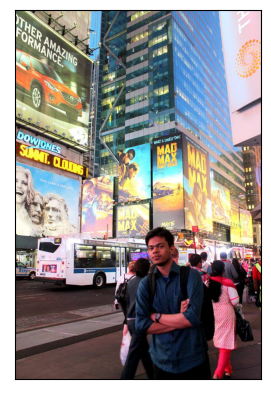

In [6]:
image = read_image('./sample.jpg')

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

transformed_image = transform(image)

mean, std = transformed_image.mean([1,2]), transformed_image.std([1,2])
transform_norm = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    # transforms.Normalize(mean, std),
])

transformed_image = transform_norm(transformed_image)
transformed_image = transformed_image.unsqueeze(0)

transformed_image = transformed_image.to(DEVICE)
show(transformed_image)


In [7]:
detections = model(transformed_image)[0]

[INFO] Person: 99.37%
[INFO] Bus: 93.05%
[INFO] Person: 99.37%
[INFO] Person: 99.37%
[INFO] Person: 99.37%
[INFO] Backpack: 37.02%
[INFO] Person: 99.37%
[INFO] Car: 98.30%


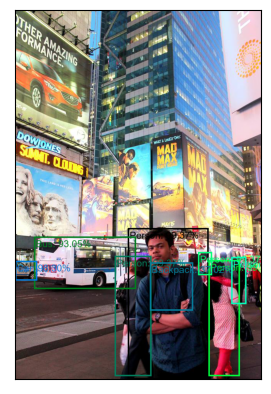

In [8]:
from torchvision.utils import draw_bounding_boxes

idx = detections['scores'] > 0.90
labels = [f'{CLASSES[x-1].capitalize()}: {detections["scores"][x]*100:.2f}%' for x in detections['labels'][idx]]

box_image=draw_bounding_boxes(image,detections['boxes'][idx],labels=labels,width=4,font_size=25,font='arial')

for label in labels:
    print(f'[INFO] {label}')

show(box_image.unsqueeze(0))

write_jpeg(box_image,'./output_pytorch.jpg')